# GRIP TASK-1 By Rajeswar Sharma
# Predict the percentage of an student based on the no. of study hours. 


In [140]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [141]:
raw_data = pd.read_csv(
    'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')


# Data Exploration

In [142]:
raw_data.shape

(25, 2)

In [143]:
raw_data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Checking for missing values

In [144]:
raw_data.isna().sum()

Hours     0
Scores    0
dtype: int64

### Non of the rows and columns have missing values

## Statistical description of the data

In [145]:
raw_data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### We can see the following trends:
####  1. The average Study time of a student is 5 hours
####  2. The average marks scored buy the students is 51/100
####  3. 50% of the students studied less than 5 hours and scored less than 47/100 in the exam
####  4. Only 25% of the students studied for 7 or more hours and scored above 75/100 in the previous exam  

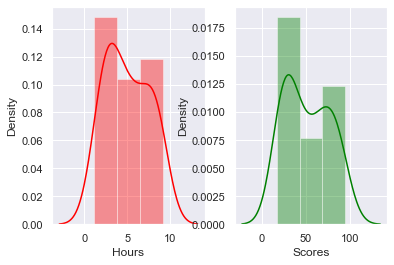

In [146]:

f, axes = plt.subplots(1, 2)
sns.distplot(raw_data['Hours'],ax=axes[0],color='red')
sns.distplot(raw_data['Scores'],ax=axes[1],color='green')
plt.show()


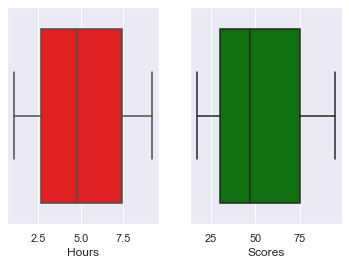

In [147]:
f, axes = plt.subplots(1, 2)
sns.boxplot(raw_data['Hours'], ax=axes[0], color='red')
sns.boxplot(raw_data['Scores'], ax=axes[1], color='green')
plt.show()


### From the above Graps we can conclude:
#### 1. Hours and Scores have acceptable normal distribution
#### 2. Data is free from outliers.

# Checking the correlations

# Plotting Hours vs Scores 

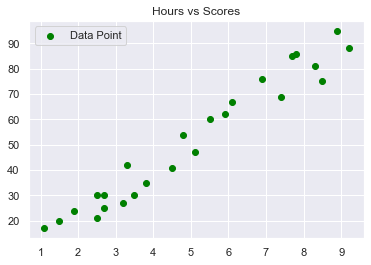

In [148]:
plt.scatter(raw_data['Hours'], raw_data['Scores'],
            color='green', label='Data Point')
plt.title('Hours vs Scores')
plt.legend()
plt.show()



### From scatter plot, Hours and Score has a linear relation between them
# Checking for the correlation coefficient

<AxesSubplot:>

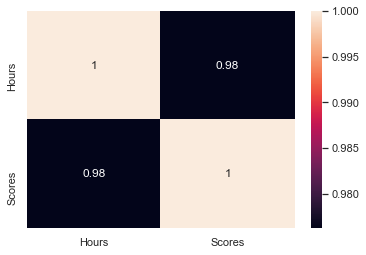

In [149]:
sns.heatmap(raw_data.corr(), annot=True)

### From the above heat map it is confirmed that both of the attributes has a quite strong correlation where coefficient is 0.98
### Hence both of the attribute can be used to predict each other

# Creating a regression model

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score


In [151]:
X = np.array(raw_data['Hours']).reshape(-1, 1)
Y = np.array(raw_data['Scores']).reshape(-1, 1)

In [152]:

x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

## Training Model

In [153]:
model = LR()
model.fit(x_train,y_train)

LinearRegression()

In [154]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


## Error Values for Training-Dataset

In [155]:
MAE = mean_absolute_error(y_train,model.predict(x_train))
MSE = mean_squared_error(y_train, model.predict(x_train))
R2_Score = r2_score(y_train, model.predict(x_train))
print("MAE: "+str(MAE)[:5])
print("MSE: "+str(MSE)[:5])
print("R2 : "+str(R2_Score)[:5])


MAE: 5.186
MSE: 30.89
R2 : 0.951


## Error Values for Test-Dataset

In [156]:
MAE = mean_absolute_error(y_test, model.predict(x_test))
MSE = mean_squared_error(y_test, model.predict(x_test))
R2_Score = r2_score(y_test, model.predict(x_test))
print("MAE: "+str(MAE)[:5])
print("MSE: "+str(MSE)[:5])
print("R2 : "+str(R2_Score)[:5])
W0 = model.intercept_[0]
W1 = model.coef_[0][0]


MAE: 4.183
MSE: 21.59
R2 : 0.945


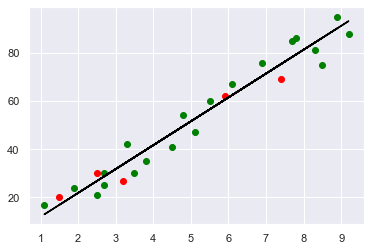

In [157]:
plt.scatter(x_train,y_train,color='green')
plt.scatter(x_test,y_test,color='red')
plt.plot(X,W0+W1*X,color='black')

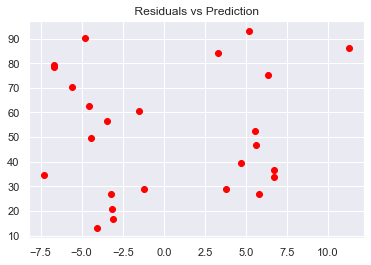

In [158]:
raw_data['Prediction'] = W0+W1*X
raw_data['Raw error'] = (raw_data['Prediction'] -raw_data['Scores'])
plt.scatter(raw_data['Raw error'], raw_data['Prediction'], color='red')
plt.title(" Residuals vs Prediction ")
plt.show()


## In the above Scatter Plot of Residuals vs Prediction, No patterns are visible. Hence, It can be concluded that error terms follow homoscedasticity.

In [159]:

Y = W0 + W1*9.25
print("Predicted Values: "+str(Y)[:5])


Predicted Values: 93.69


## Conclusion: If a student studies for 9.25 hours then he/she can score upto 93.69 in the next exam.